<a href="https://www.kaggle.com/code/leventorhan/data-analysis-for-data-science-job-salaries?scriptVersionId=151178916" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction

## Aspiring Data Analyst | Data Science Job Salaries Analysis

As an aspiring data analyst, I embarked on a data analysis project to gain valuable insights into the salaries and job market trends for data science professionals. For this analysis, I utilized the "Data Science Job Salaries" dataset sourced from Kaggle, containing information on salaries, experience levels, employment types, and geographic distributions.

## Description of the Dataset:

The "Data Science Job Salaries" dataset consists of 11 columns, each providing essential details about data science job salaries. The dataset includes information on the work year, experience level, employment type, job title, salary amount, salary currency, salary in USD, employee residence country, remote work ratio, company location, and company size.


# Purpose of the Analysis:
    
The primary purpose of this analysis is to gain a comprehensive understanding of salary trends in the data science job market and identify key factors influencing compensation. By exploring the dataset and conducting insightful data visualizations, I aim to uncover valuable insights such as salary growth patterns over the years, the impact of experience levels and employment types on salaries, geographic variations in compensation, and the influence of remote work opportunities.

By delving into these aspects, this data analysis project will provide actionable recommendations for both data analysts seeking job opportunities and employers looking to attract top talent. The findings from this analysis will empower data analysts to make informed decisions about their careers, while employers can tailor their hiring strategies and compensation structures to attract skilled data science professionals effectively.
    
Throughout this project, I utilized Python programming along with essential data analysis and visualization libraries such as pandas, numpy, matplotlib, and seaborn. The analysis process involved exploratory data analysis, and the creation of insightful visualizations to communicate the findings effectively.

Let's dive into the analysis to unlock the hidden patterns and trends within the data science job market!


# Importing Python Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# Set default settings for data visualization
sns.set(style="whitegrid")
%matplotlib inline


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/data-science-salaries-2023/ds_salaries.csv


# Loading the Dataset into a DataFrame

In this step, we'll load the Data Science Job Salaries dataset into a DataFrame and gain an initial understanding of the data.


In [2]:
# Load the dataset into a DataFrame
df = pd.read_csv('/kaggle/input/data-science-salaries-2023/ds_salaries.csv') 

# Overview of the dataset
print("Dataset Overview:")
print(df.head())  # Display the first few rows of the dataset
print("\nData Information:")
print(df.info())  # Display general information about the dataset, like data types and non-null counts
print("\nSummary Statistics:")
print(df.describe())  # Display summary statistics for numerical columns

Dataset Overview:
   work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0               ES            L  


# Exploratory Data Analysis (EDA)

In this step, we'll perform Exploratory Data Analysis (EDA) on the Data Science Job Salaries dataset. EDA will help us gain insights, discover patterns, and identify relationships between variables.

## Distribution of Salary

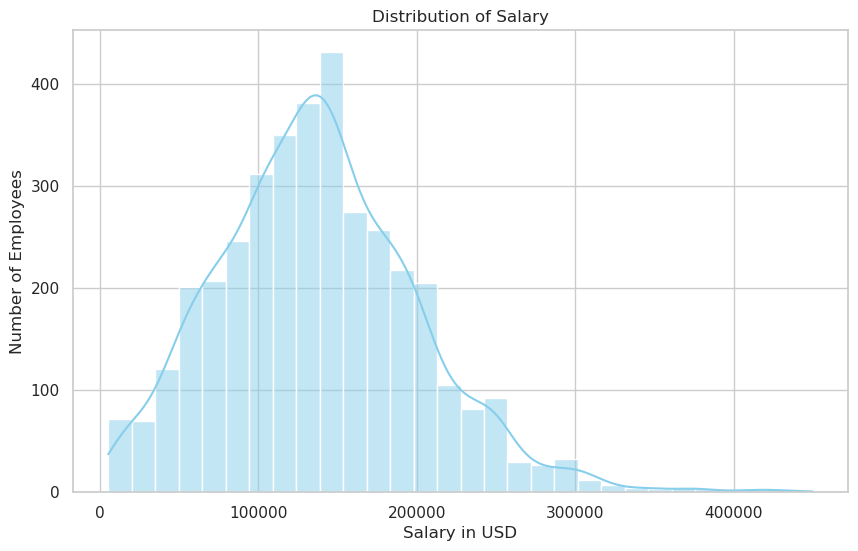

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Salary')
plt.xlabel('Salary in USD')
plt.ylabel('Number of Employees')
plt.show()

A large portion of the employees' salaries fall within the range of 100-150k dollars.

## Salary Trends over the Years

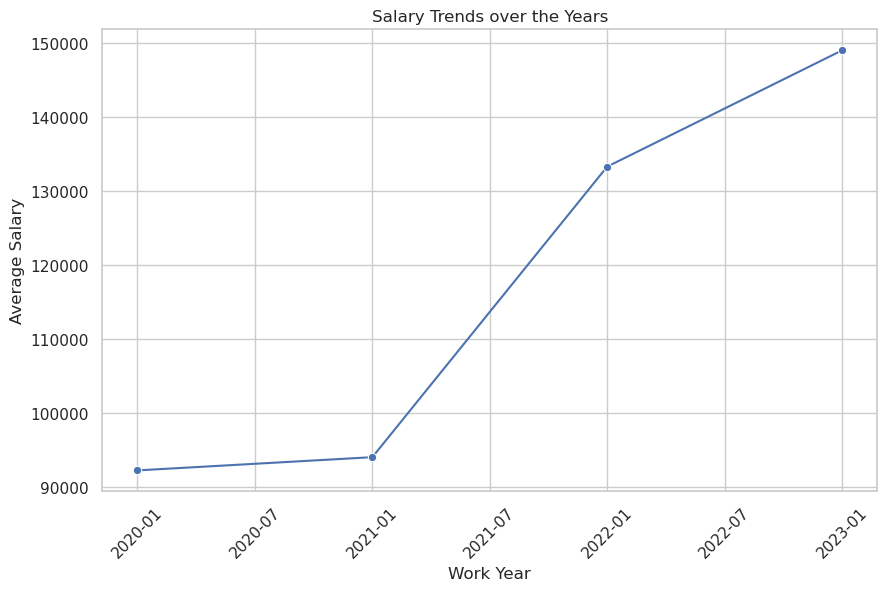

In [4]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='work_year', y='salary_in_usd', data=df, estimator='mean', errorbar=None, marker='o')
plt.title('Salary Trends over the Years')
plt.xlabel('Work Year')
plt.ylabel('Average Salary')
x = [2020.0, 2020.5 ,2021.0, 2021.5, 2022.0, 2022.5, 2023.0]
labels_year2date=["2020-01","2020-07","2021-01","2021-07","2022-01","2022-07","2023-01"]
plt.xticks(x, labels=labels_year2date, rotation=45)
plt.show()

Significant portion of entry-level employees earn between 50k to 100k, and when we look at the executive employees, a vast majority of them receive a salary around 200k.

## Relationships between Salary and Experience Level

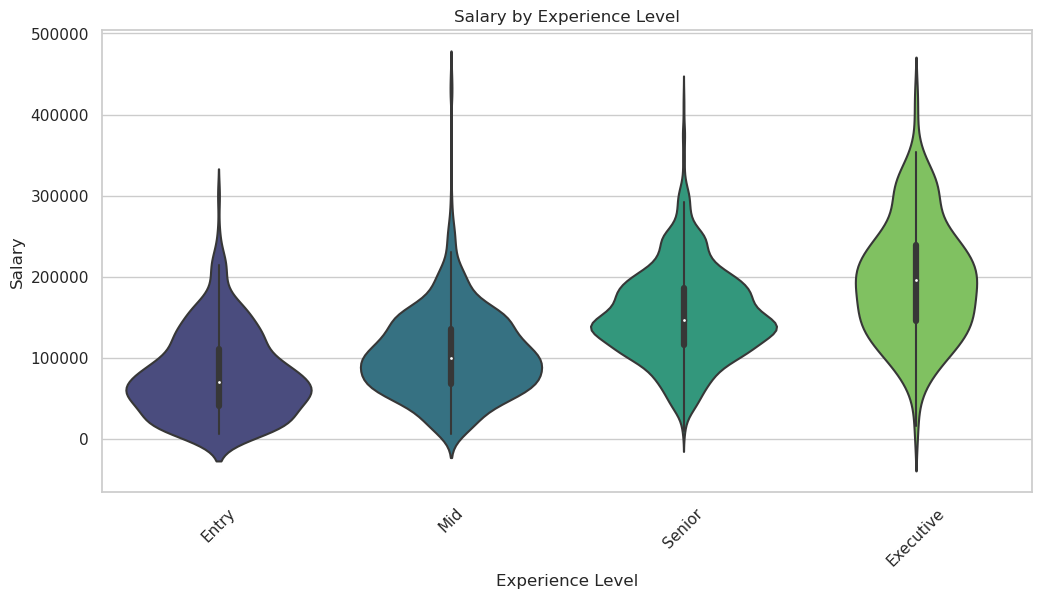

In [5]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='experience_level', y='salary_in_usd', order=['EN','MI','SE','EX'], data=df, palette='viridis')
plt.title('Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
x_labels_order = ['Entry', 'Mid', 'Senior', 'Executive']
plt.xticks(ticks=[0, 1, 2, 3], labels=x_labels_order, rotation=45)
plt.show()

Salaries started to gain upward momentum from the year 2021 onwards.

## Impact of employment type, remote work ratio, and company size on salaries

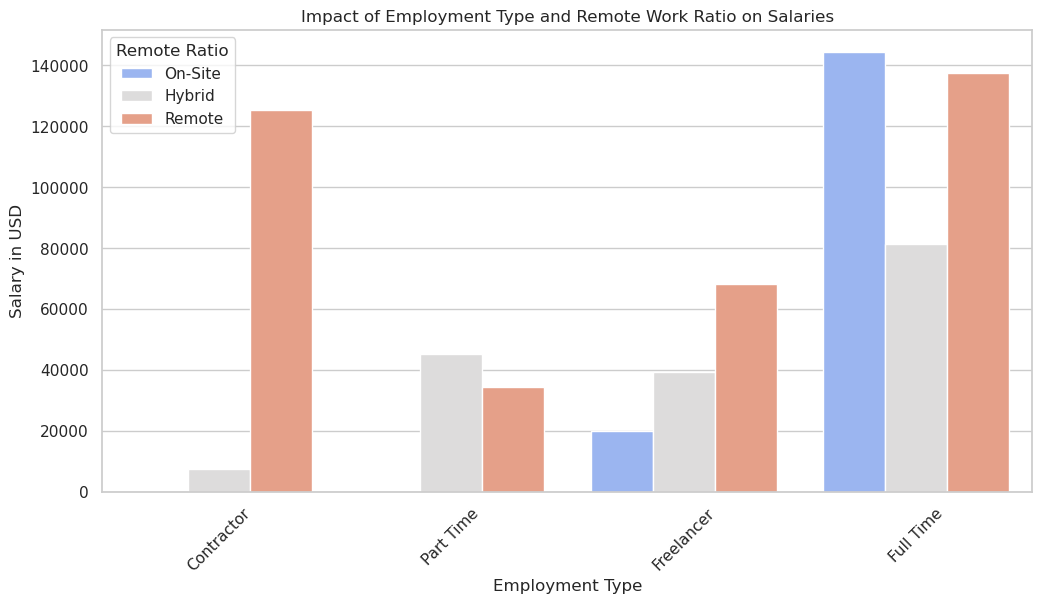

In [6]:
plt.figure(figsize=(12, 6))
sns.barplot(x='employment_type', y='salary_in_usd', hue='remote_ratio', order=['CT','PT','FL','FT'], data=df, errorbar=None, palette='coolwarm')
plt.title('Impact of Employment Type and Remote Work Ratio on Salaries')
plt.xlabel('Employment Type')
plt.ylabel('Salary in USD')
x_labels_order_et = ['Contractor', 'Part Time', 'Freelancer', 'Full Time']
legend_labels= ['On-Site','Hybrid','Remote']
plt.legend(labels = legend_labels, title='Remote Ratio', loc='upper left')
plt.xticks(ticks=[0, 1, 2, 3], labels=x_labels_order_et, rotation=45)
plt.show()

As expected, the highest earnings are, of course, provided by full-time positions, but the salary of a remote working contractor is also quite high.

## Highest Paying Job Titles & Lowest Paying Job Titles

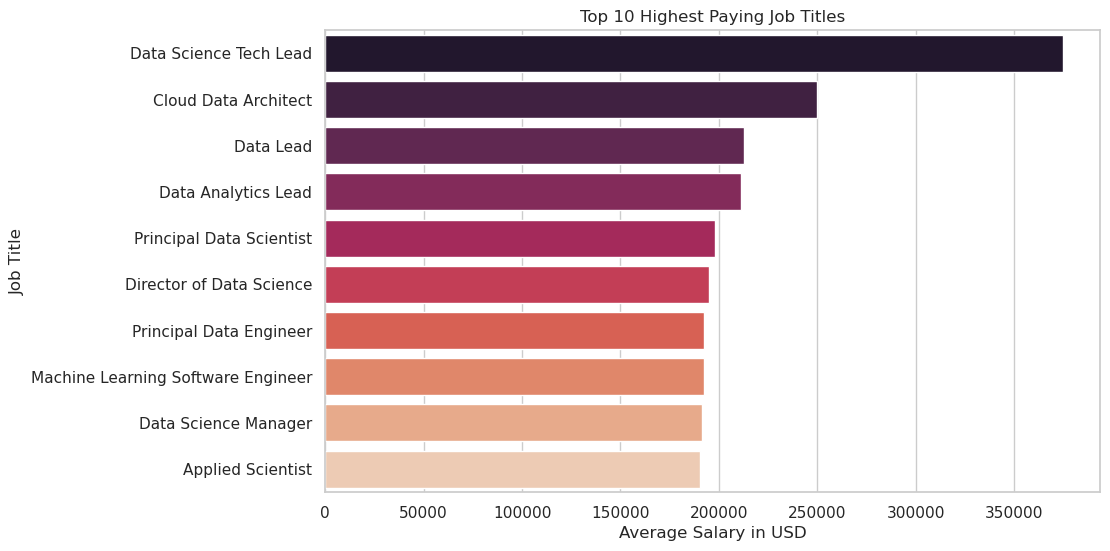

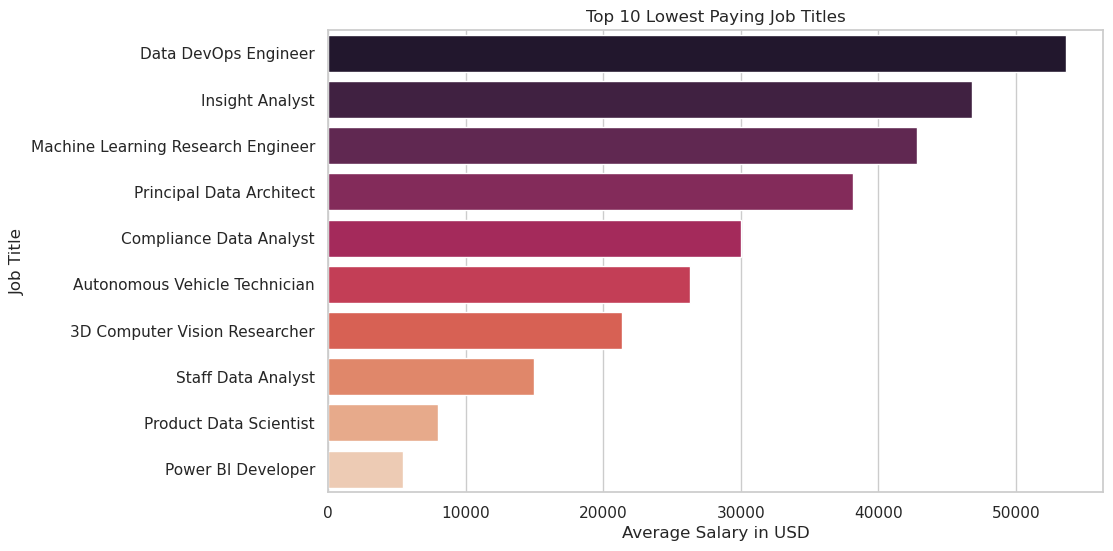

In [7]:
highest_paying_jobs = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=highest_paying_jobs.values, y=highest_paying_jobs.index, palette='rocket')
plt.title('Top 10 Highest Paying Job Titles')
plt.xlabel('Average Salary in USD')
plt.ylabel('Job Title')
plt.show()

lowest_paying_jobs = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).tail(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=lowest_paying_jobs.values, y=lowest_paying_jobs.index, palette='rocket')
plt.title('Top 10 Lowest Paying Job Titles')
plt.xlabel('Average Salary in USD')
plt.ylabel('Job Title')
plt.show()


According to these two graphs, the Power BI developer has the lowest salary, while the Data Science Tech Lead has the highest salary.

## Top 10 Job Titles with the Most Employees

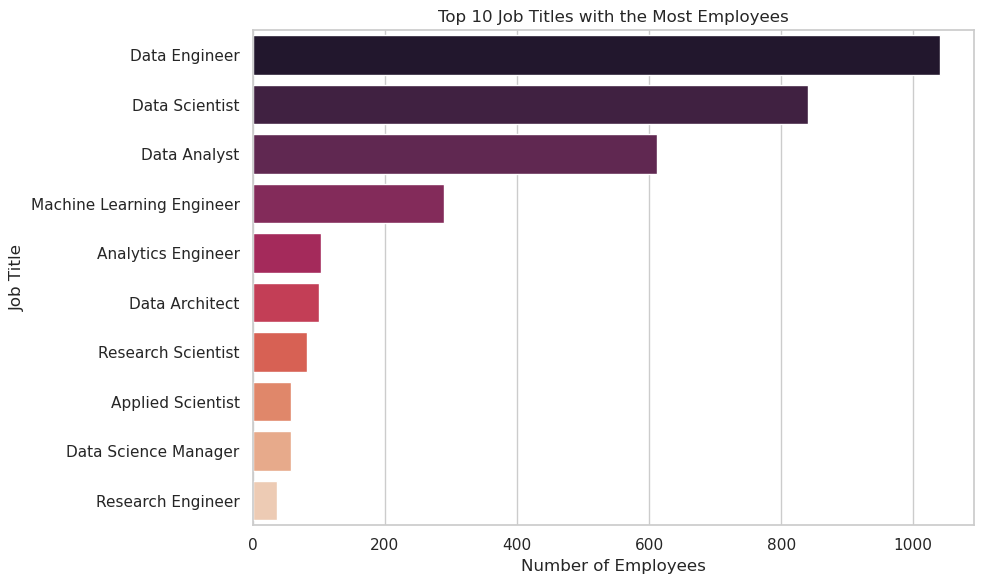

In [8]:
top_10_job_titles = df['job_title'].value_counts().nlargest(10).index
top_10_job_titles_df = df[df['job_title'].isin(top_10_job_titles)]
employee_count_by_job = top_10_job_titles_df['job_title'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=employee_count_by_job.values, y=employee_count_by_job.index, palette='rocket')
plt.title('Top 10 Job Titles with the Most Employees')
plt.xlabel('Number of Employees')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

The majority of employees hold roles such as Data Engineer, Data Scientist, Data Analyst, and Machine Learning Engineer.

## Distribution of Experience Levels for Top 4 Job Titles with Most Employees

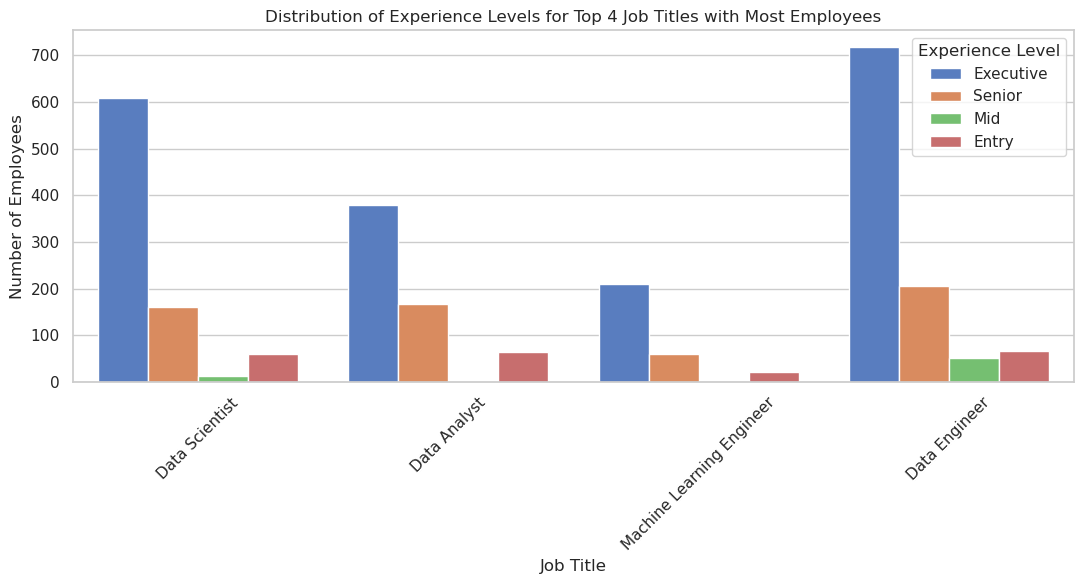

In [9]:
top_4_job_titles = df['job_title'].value_counts().nlargest(4).index
top_4_job_titles_df = df[df['job_title'].isin(top_4_job_titles)]
plt.figure(figsize=(11, 6))
sns.countplot(x='job_title', hue='experience_level',data=top_4_job_titles_df, palette='muted')
plt.title('Distribution of Experience Levels for Top 4 Job Titles with Most Employees')
plt.xlabel('Job Title')
plt.ylabel('Number of Employees')
legend_labels= ['Executive','Senior','Mid', 'Entry']
plt.legend(labels = legend_labels ,title='Experience Level', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The top 4 professions with the highest number of employees in the sector, we can observe that a vast majority of the workforce holds the experience level of "Senior."

## Salary Trends Over Years for Top 4 Job Titles with Most Employees

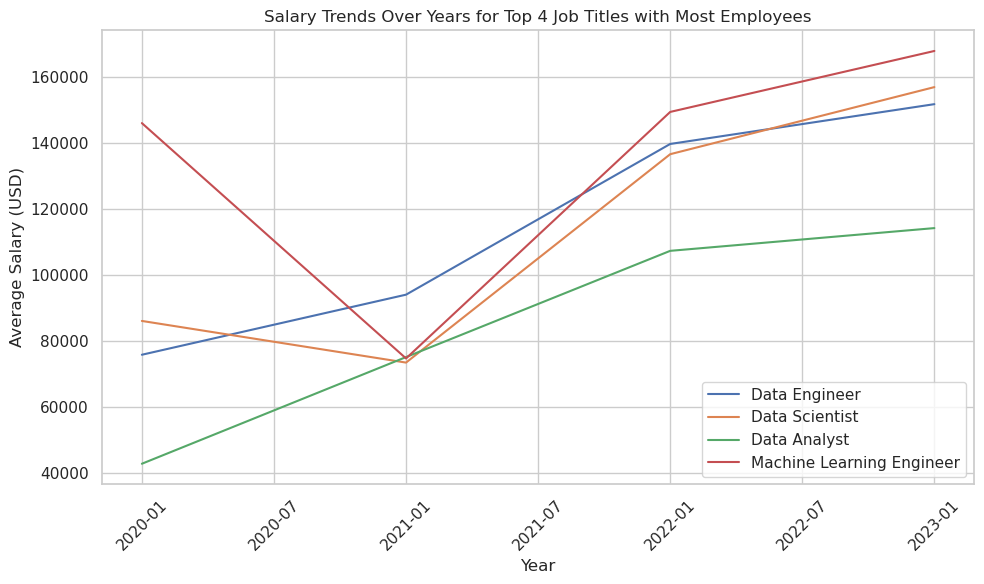

In [10]:
top_4_job_titles = df['job_title'].value_counts().nlargest(4).index
top_4_job_titles_df = df[df['job_title'].isin(top_4_job_titles)]
average_salary_by_job_and_year = top_4_job_titles_df.groupby(['job_title', 'work_year'])['salary_in_usd'].mean().reset_index()
plt.figure(figsize=(10, 6))
for job_title in top_4_job_titles:
    job_data = average_salary_by_job_and_year[average_salary_by_job_and_year['job_title'] == job_title]
    plt.plot(job_data['work_year'], job_data['salary_in_usd'], label=job_title)

plt.title('Salary Trends Over Years for Top 4 Job Titles with Most Employees')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
x = [2020.0, 2020.5 ,2021.0, 2021.5, 2022.0, 2022.5, 2023.0]
labels_year2date=["2020-01","2020-07","2021-01","2021-07","2022-01","2022-07","2023-01"]
plt.xticks(x, labels=labels_year2date, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Contrary to the prevailing market trend, the Machine Learning Engineer Salary showed a decrease until 2021. However, in 2021, it adapted to the market and started to rise.

## Salary trends over the years by Experience Level

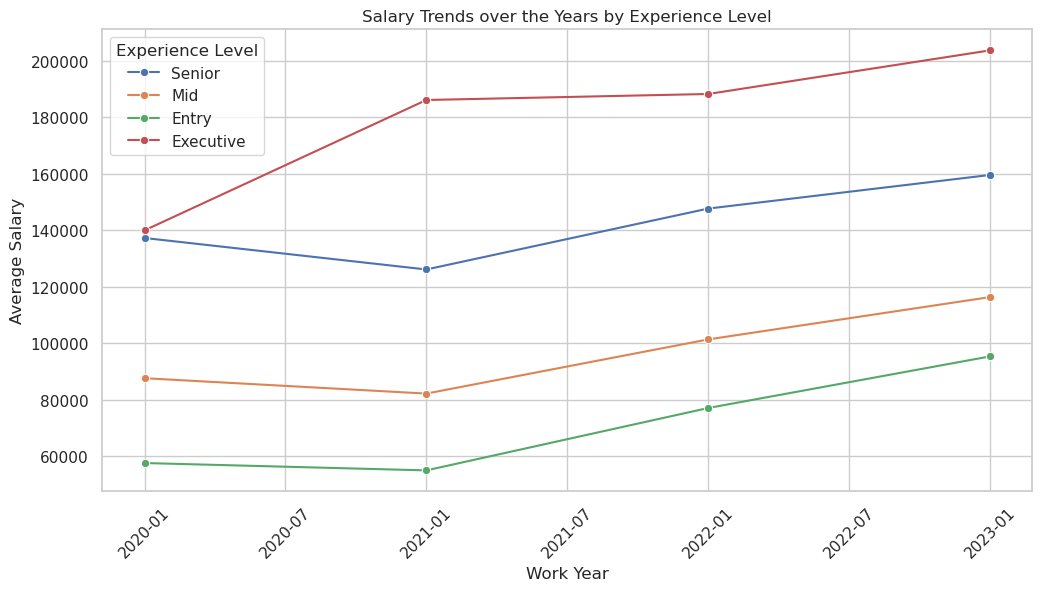

In [11]:
legend_labels_xp = ['Senior','Mid','Entry','Executive']
plt.figure(figsize=(12, 6))
sns.lineplot(x='work_year', y='salary_in_usd', hue='experience_level', data=df, estimator='mean', errorbar=None, marker='o')
plt.title('Salary Trends over the Years by Experience Level')
x = [2020.0, 2020.5 ,2021.0, 2021.5, 2022.0, 2022.5, 2023.0]
labels_year2date=["2020-01","2020-07","2021-01","2021-07","2022-01","2022-07","2023-01"]
plt.xticks(x, labels=labels_year2date, rotation=45)
plt.xlabel('Work Year')
plt.ylabel('Average Salary')
plt.legend(labels = legend_labels_xp, title='Experience Level', loc='upper left')
plt.show()

Between 2020 and 2021, the salaries for entry, mid, and senior experience levels were following a decreasing trend, but starting from 2021, they have transitioned to an increasing trend. On the other hand, the executive level has a significant upward trend during the 2020-2021 period, unlike the other experience levels.

## Salary trends over the years by Employment Type

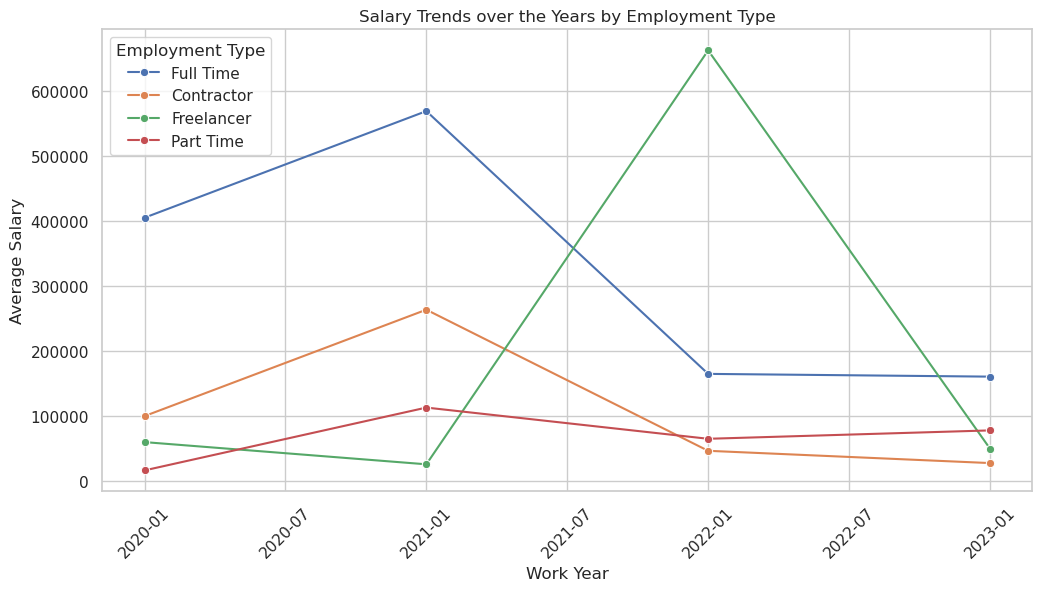

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='work_year', y='salary', hue='employment_type', data=df, estimator='mean', errorbar=None, marker='o')
plt.title('Salary Trends over the Years by Employment Type')
legend_labels_et = ['Full Time', 'Contractor', 'Freelancer', 'Part Time']
x = [2020.0, 2020.5 ,2021.0, 2021.5, 2022.0, 2022.5, 2023.0]
labels_year2date=["2020-01","2020-07","2021-01","2021-07","2022-01","2022-07","2023-01"]
plt.xticks(x, labels=labels_year2date, rotation=45)
plt.xlabel('Work Year')
plt.ylabel('Average Salary')
plt.legend(labels = legend_labels_et, title='Employment Type', loc='upper left')
plt.show()

Between the 2021 and 2022 seasons, the salary trend for full-time, contractor, and part-time employees experienced a significant decline. Surprisingly, during the same period, the salary trend for freelancers increased notably. However, upon reaching the 2023 season, we see that it has approached its value from the year 2020 again.

## Distribution of salaries across different countries

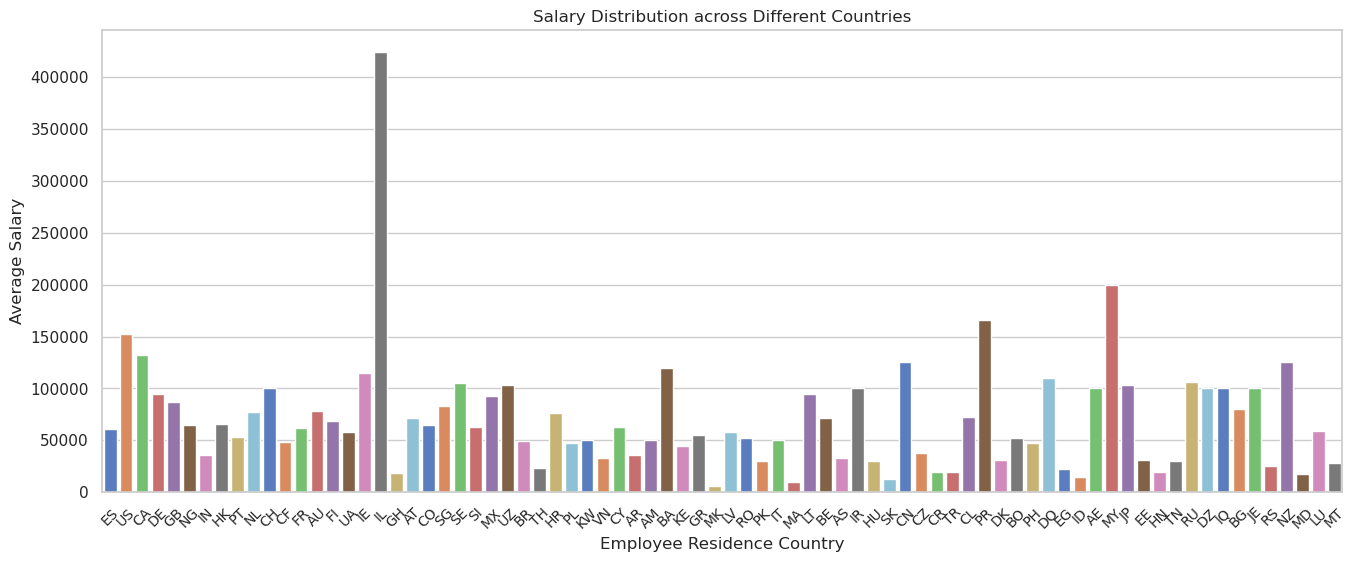

In [13]:
plt.figure(figsize=(16, 6))
sns.barplot(x='employee_residence', y='salary_in_usd', data=df, errorbar=None, palette='muted')
plt.title('Salary Distribution across Different Countries')
plt.xlabel('Employee Residence Country')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, fontsize=10)
plt.show()


The average salary across all countries is $137,500, and Israel's salary is nearly three times higher than this average value.

## Job opportunities and company locations on the map


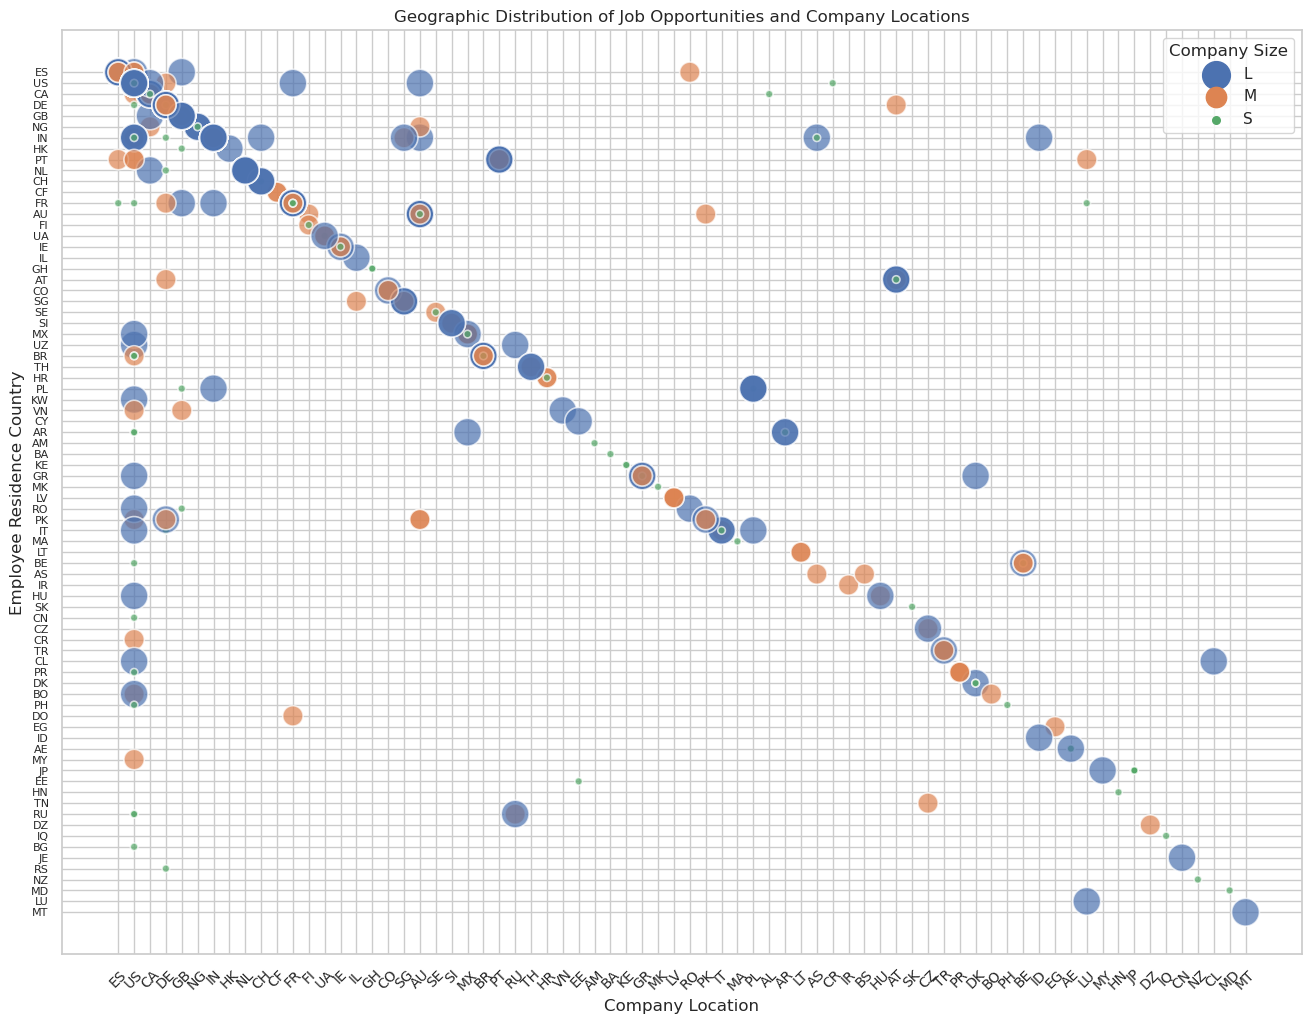

In [14]:
plt.figure(figsize=(16, 12))
sns.scatterplot(x='company_location', y='employee_residence', size='company_size', size_order=['L','M','S'], hue='company_size', hue_order = ['L','M','S'],legend = 'full', data=df, sizes=(30, 400), alpha=0.7)
plt.title('Geographic Distribution of Job Opportunities and Company Locations')
plt.xlabel('Company Location')
plt.ylabel('Employee Residence Country')
plt.legend(title='Company Size')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=8)
plt.show()

There are significantly more work opportunities in the US compared to other countries, and the number of remote employees in the US is notably higher as well when compared to other countries.

# Thank You

I am happy to share my first analysis. 

Based on the data and graphs, I have made various observations. As I gain more experience, I will enhance this project in the future.

If you liked this analysis, don't forget to upvote! 

Feel free to share any comments, including critiques or suggestions, without hesitation!